# **Classifying Tweets between Obama and Trump Using Word Embeddings**
#### Name: Qi Zhou
#### NetID: qiz18023

##**Part 1: Data Preparation**

### 1.1 Scrape tweets and save to the drive

In [1]:
pip install getoldtweets3

In [2]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc2)


In [0]:
import GetOldTweets3 as got
def scrape_tweets(username):
  username = username
  count = 2000
  tweetCriteria = got.manager.TweetCriteria().setUsername(username)\
                                        .setMaxTweets(count)
  tweets = got.manager.TweetManager.getTweets(tweetCriteria)
  user_tweets = [[tweet.text] for tweet in tweets]
  return user_tweets

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Use above function to return tweets of Trump and Obama.
trump = scrape_tweets('realDonaldTrump')
obama = scrape_tweets('BarackObama')

In [0]:
# Save all tweets to two folders
# Update the code with your own variables and paths.
# The resulted files will be in two folders just like IMDB data.
for i in range(0,len(trump)):
  path='/content/drive/My Drive/Deep Learning/Week 5/twitter/trump/trump'+str(i)+'.txt'
  with open(path, "w") as output:
    output.write(str(trump[i]))
for i in range(0,len(obama)):
  path='/content/drive/My Drive/Deep Learning/Week 5/twitter/obama/obama'+str(i)+'.txt'
  with open(path, "w") as output:
    output.write(str(obama[i]))

### 1.2 Load the text data and vectorize it  

In [7]:
# Load the tweets from the drive 
import os
tweets_dir = '/content/drive/My Drive/Deep Learning/Week 5/twitter'
labels = []
texts = []
count = 0
for label_type in ['trump/', 'obama/']:
    dir_name = os.path.join(tweets_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            count = count + 1
            print(count)
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'trump/':
                labels.append(1)
            else:
                labels.append(0)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [8]:
labels[3000]

0

### 1.3 Tokenize and pad the sequences

In [9]:
# Tokenize, pad and prepare training and validation data
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

maxlen = 60  # We will cut reviews after 60 words
training_samples = 3000  # We will be training on 3000 samples
validation_samples = 1000  # We will be validating on 1000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

Using TensorFlow backend.


In [10]:
# This class allows to vectorize a text corpus, by turning each text into either a sequence of integers
# omits common characters 
tokenizer = Tokenizer(num_words=max_words)

# fit_on_texts means it learns the indices of the words
tokenizer.fit_on_texts(texts)

# the sequences are comprised of those indices
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# in case of low word counts, we need to pad sequences
# so that they are uniform length
data = pad_sequences(sequences, maxlen=maxlen)

# our labels, which were previously stored as a list [],
# are now converted to a numpy array for modeling
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10172 unique tokens.
Shape of data tensor: (4000, 60)
Shape of label tensor: (4000,)


### 1.4 Prepare the tranning and validation data

In [11]:
# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # from 0 to (3000) training samples
y_train = labels[:training_samples]

x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(3000, 60)
(3000,)
(1000, 60)
(1000,)


## **Part 2: Modeling**

### 2.1 Set the embeddings

In [12]:
glove_dir = '/content/drive/My Drive/Deep Learning/Week 4/glove.6B/'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [0]:
embedding_dim = 100 

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

### 2.2 Build the model and train the data

In [14]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import save_model, load_model


# Model 1: LSTM 
model1 = Sequential()
model1.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model1.add(layers.LSTM(50, activation='relu', input_shape=(x_train.shape[1],)))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(1))
model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 100)           1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                30200     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1632      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,031,865
Trainable params: 1,031,865
Non-trainable params: 0
______________________________________________

In [15]:
# Model 1: LSTM 

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model1.layers[0].set_weights([embedding_matrix])
model1.layers[0].trainable = False

model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history1 = model1.fit(x_train, y_train, epochs=15, batch_size=30, validation_data=(x_val, y_val))



Epoch 1/15
100/100 [==============================] - 3s 31ms/step - loss: 1.0271 - acc: 0.7340 - val_loss: 0.3501 - val_acc: 0.8400
Epoch 2/15
100/100 [==============================] - 3s 29ms/step - loss: 0.6117 - acc: 0.8137 - val_loss: 0.3384 - val_acc: 0.8570
Epoch 3/15
100/100 [==============================] - 3s 29ms/step - loss: 0.4413 - acc: 0.8443 - val_loss: 0.3339 - val_acc: 0.8920
Epoch 4/15
100/100 [==============================] - 3s 29ms/step - loss: 0.4420 - acc: 0.8763 - val_loss: 0.2994 - val_acc: 0.9010
Epoch 5/15
100/100 [==============================] - 3s 29ms/step - loss: 0.3340 - acc: 0.8947 - val_loss: 0.2972 - val_acc: 0.9280
Epoch 6/15
100/100 [==============================] - 3s 28ms/step - loss: 0.3337 - acc: 0.9110 - val_loss: 0.2931 - val_acc: 0.9290
Epoch 7/15
100/100 [==============================] - 3s 29ms/step - loss: 0.3928 - acc: 0.9103 - val_loss: 0.3042 - val_acc: 0.9310
Epoch 8/15
100/100 [==============================] - 3s 30ms/step - 

In [22]:
# Model 2: Bidirectional LSTM 
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.layers import LSTM

model2 = Sequential()
model2.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model2.add(layers.Bidirectional(LSTM(50, activation='relu', input_shape=(x_train.shape[1],))))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(1))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 60, 100)           1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               60400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                3232      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,063,665
Trainable params: 1,063,665
Non-trainable params: 0
____________________________________________

In [25]:
# Model 2: Bidirectional LSTM
model2.layers[0].set_weights([embedding_matrix])
model2.layers[0].trainable = False

model2.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])
history2 = model2.fit(x_train, y_train,
                    epochs=20,
                    batch_size=30,
                    validation_data=(x_val, y_val))

Epoch 1/20
100/100 [==============================] - 5s 47ms/step - loss: 1.4029 - acc: 0.7267 - val_loss: 0.3613 - val_acc: 0.8470
Epoch 2/20
100/100 [==============================] - 4s 44ms/step - loss: 0.5945 - acc: 0.8247 - val_loss: 0.5189 - val_acc: 0.8760
Epoch 3/20
100/100 [==============================] - 4s 44ms/step - loss: 0.4042 - acc: 0.8613 - val_loss: 0.3840 - val_acc: 0.8660
Epoch 4/20
100/100 [==============================] - 4s 44ms/step - loss: 0.5423 - acc: 0.8807 - val_loss: 1.7775 - val_acc: 0.8300
Epoch 5/20
100/100 [==============================] - 4s 44ms/step - loss: 0.5006 - acc: 0.8990 - val_loss: 0.2648 - val_acc: 0.9070
Epoch 6/20
100/100 [==============================] - 4s 44ms/step - loss: 0.6159 - acc: 0.9027 - val_loss: 0.4181 - val_acc: 0.9230
Epoch 7/20
100/100 [==============================] - 4s 44ms/step - loss: 2.2050 - acc: 0.8103 - val_loss: 2.8702 - val_acc: 0.7790
Epoch 8/20
100/100 [==============================] - 4s 43ms/step - 

In [23]:
# Model 3: Conv1D LSTM  
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import save_model, load_model

model3 = Sequential()
model3.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model3.add(layers.Convolution1D(filters=32, kernel_size=3, padding='same',activation='relu'))
model3.add(layers.MaxPooling1D(pool_size=2))
model3.add(layers.LSTM(50, activation='relu', input_shape=(x_train.shape[1],)))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(1))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 60, 100)           1000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 60, 32)            9632      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 30, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1632      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)               

In [26]:
# Model 3: Conv1D LSTM
model3.layers[0].set_weights([embedding_matrix])
model3.layers[0].trainable = False

model3.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])
history3 = model3.fit(x_train, y_train,
                    epochs=30,
                    batch_size=30,
                    validation_data=(x_val, y_val))

Epoch 1/30
100/100 [==============================] - 2s 24ms/step - loss: 7.5634 - acc: 0.5097 - val_loss: 8.1208 - val_acc: 0.4710
Epoch 2/30
100/100 [==============================] - 2s 22ms/step - loss: 7.5634 - acc: 0.5097 - val_loss: 8.1208 - val_acc: 0.4710
Epoch 3/30
100/100 [==============================] - 2s 22ms/step - loss: 7.5634 - acc: 0.5097 - val_loss: 8.1208 - val_acc: 0.4710
Epoch 4/30
100/100 [==============================] - 2s 22ms/step - loss: 7.5634 - acc: 0.5097 - val_loss: 8.1208 - val_acc: 0.4710
Epoch 5/30
100/100 [==============================] - 2s 22ms/step - loss: 7.5634 - acc: 0.5097 - val_loss: 8.1208 - val_acc: 0.4710
Epoch 6/30
100/100 [==============================] - 2s 23ms/step - loss: 7.5634 - acc: 0.5097 - val_loss: 8.1208 - val_acc: 0.4710
Epoch 7/30
100/100 [==============================] - 2s 22ms/step - loss: 7.5634 - acc: 0.5097 - val_loss: 8.1208 - val_acc: 0.4710
Epoch 8/30
100/100 [==============================] - 2s 22ms/step - 

In [24]:
# Model 4: Monster
model4 = Sequential()
model4.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model4.add(layers.Convolution1D(filters=32, kernel_size=3, padding='same',activation='relu'))
model4.add(layers.MaxPooling1D(pool_size=2))
model4.add(layers.LSTM(50, activation = 'relu',return_sequences = True))
model4.add(layers.Dropout(0.2))
model4.add(layers.GRU(50, activation = 'relu'))
model4.add(layers.Dropout(0.2))
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dropout(0.4))
model4.add(layers.Dense(16, activation = 'relu'))
model4.add(layers.Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 60, 100)           1000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60, 32)            9632      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 30, 32)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 50)            16600     
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
gru (GRU)                    (None, 50)                15300     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)               

In [27]:
# Model 4: Monster
model4.layers[0].set_weights([embedding_matrix])
model4.layers[0].trainable = False

model4.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['acc'])
history4 = model4.fit(x_train, y_train,
                    epochs=20,
                    batch_size=30,
                    validation_data=(x_val, y_val))

Epoch 1/20
100/100 [==============================] - 4s 41ms/step - loss: 0.5331 - acc: 0.7323 - val_loss: 0.5002 - val_acc: 0.7530
Epoch 2/20
100/100 [==============================] - 3s 35ms/step - loss: 0.3351 - acc: 0.8703 - val_loss: 0.2351 - val_acc: 0.9060
Epoch 3/20
100/100 [==============================] - 4s 35ms/step - loss: 0.2560 - acc: 0.9037 - val_loss: 0.2015 - val_acc: 0.9170
Epoch 4/20
100/100 [==============================] - 3s 35ms/step - loss: 0.2302 - acc: 0.9143 - val_loss: 0.1814 - val_acc: 0.9230
Epoch 5/20
100/100 [==============================] - 3s 35ms/step - loss: 0.2002 - acc: 0.9253 - val_loss: 0.2105 - val_acc: 0.9080
Epoch 6/20
100/100 [==============================] - 3s 35ms/step - loss: 0.1685 - acc: 0.9383 - val_loss: 0.1691 - val_acc: 0.9320
Epoch 7/20
100/100 [==============================] - 3s 34ms/step - loss: 0.1489 - acc: 0.9410 - val_loss: 0.1677 - val_acc: 0.9280
Epoch 8/20
100/100 [==============================] - 3s 35ms/step - 

In [0]:
model1.save_weights('LSTM_Model.h5')
model2.save_weights('Bidirectional_LSTM_Model.h5')
model3.save_weights('Cov1D_LSTM_Model.h5')
model4.save_weights('Monster_Model.h5')

## **Part 3: Analysis**

### 3.1 Compare the results

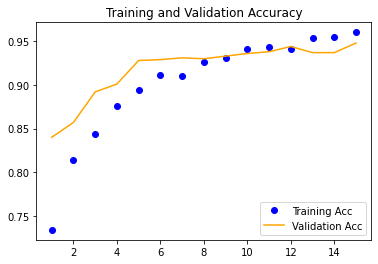

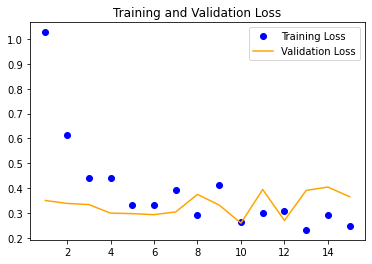

In [29]:
import matplotlib.pyplot as plt

# Model 1: LSTM
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'orange', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

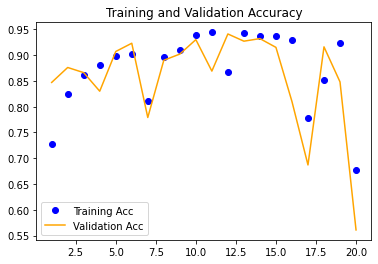

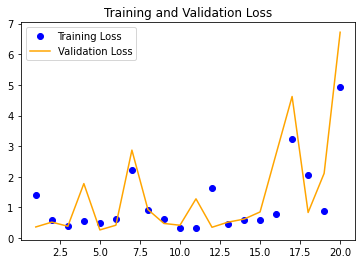

In [30]:
# Model 2: Bidirectional LTSM
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'orange', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


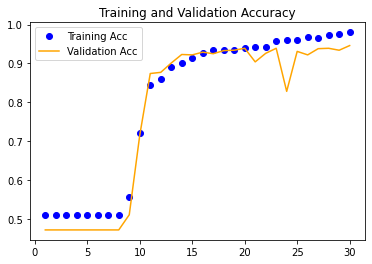

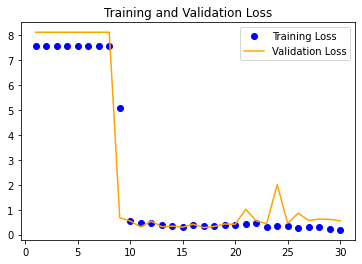

In [31]:
# Model 3: Cov1D LSTM
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'orange', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

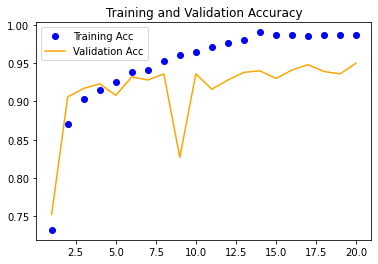

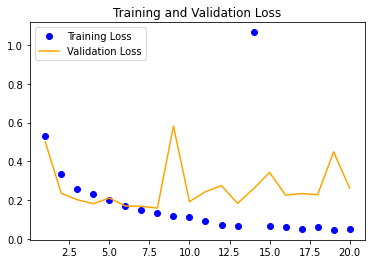

In [32]:
# Model 4: Monster
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'orange', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### 3.2 Report the confusion matrix

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
def optimal_cutoff(target, predicted):
  fpr, tpr, threshold = roc_curve(target, predicted)
  i = np.arange(len(tpr)) 
  roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
  roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
  return list(roc_t['threshold']) 

In [34]:
# Model 1: LSTM model
model1_train_preds = model1.predict(x_train)
threshold1 = optimal_cutoff(y_train, model1_train_preds)
model1_class_prob = model1.predict_proba(x_val)

i=0  
model1_preds_class =np.empty(model1_class_prob.shape)
while i < len(model1_class_prob):
    if(model1_class_prob[i]<=threshold1):
        model1_preds_class[i]=0
    else:
        model1_preds_class[i]=1
    i+=1

print('Classification for Model 1:')
print(classification_report(y_val, model1_preds_class))

print('Confusion Matrix for Model 1:' )
print(confusion_matrix(y_val, model1_preds_class))

Instructions for updating:
Please use `model.predict()` instead.
Classification for Model 1:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       471
           1       0.95      0.95      0.95       529

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

Confusion Matrix for Model 1:
[[446  25]
 [ 28 501]]


In [35]:
# Model 2: Bidirectioanl LSTM
model2_train_preds = model2.predict(x_train)
threshold2 = optimal_cutoff(y_train, model2_train_preds)
model2_class_prob = model2.predict_proba(x_val)

i=0  
model2_preds_class =np.empty(model2_class_prob.shape)
while i < len(model2_class_prob):
    if(model2_class_prob[i]<=threshold2):
        model2_preds_class[i]=0
    else:
        model2_preds_class[i]=1
    i+=1

print('Classification for Model 2:')
print(classification_report(y_val, model2_preds_class))

print('Confusion Matrix for Model 2:' )
print(confusion_matrix(y_val, model2_preds_class))

Classification for Model 2:
              precision    recall  f1-score   support

           0       0.37      0.40      0.39       471
           1       0.43      0.41      0.42       529

    accuracy                           0.40      1000
   macro avg       0.40      0.40      0.40      1000
weighted avg       0.40      0.40      0.40      1000

Confusion Matrix for Model 2:
[[187 284]
 [313 216]]


In [36]:
# Model 3: Conv1D LSTM
model3_train_preds = model3.predict(x_train)
threshold3 = optimal_cutoff(y_train, model3_train_preds)
model3_class_prob = model3.predict_proba(x_val)

i=0  
model3_preds_class =np.empty(model3_class_prob.shape)
while i < len(model3_class_prob):
    if(model3_class_prob[i]<=threshold3):
        model3_preds_class[i]=0
    else:
        model3_preds_class[i]=1
    i+=1

print('Classification for Model 2:')
print(classification_report(y_val, model3_preds_class))

print('Confusion Matrix for Model 2:' )
print(confusion_matrix(y_val, model3_preds_class))

Classification for Model 2:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       471
           1       0.96      0.94      0.95       529

    accuracy                           0.94      1000
   macro avg       0.94      0.95      0.94      1000
weighted avg       0.95      0.94      0.95      1000

Confusion Matrix for Model 2:
[[450  21]
 [ 34 495]]


In [37]:
# Model 4: Monster
model4_train_preds = model4.predict(x_train)
threshold4 = optimal_cutoff(y_train, model4_train_preds)
model4_class_prob = model4.predict_proba(x_val)

i=0  
model4_preds_class =np.empty(model4_class_prob.shape)
while i < len(model4_class_prob):
    if(model4_class_prob[i]<=threshold4):
        model4_preds_class[i]=0
    else:
        model4_preds_class[i]=1
    i+=1

print('Classification for Model 2:')
print(classification_report(y_val, model4_preds_class))

print('Confusion Matrix for Model 2:' )
print(confusion_matrix(y_val, model4_preds_class))

Classification for Model 2:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       471
           1       0.97      0.94      0.95       529

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

Confusion Matrix for Model 2:
[[455  16]
 [ 34 495]]


### 3.3 Recommend improvements

#### Initially, I had the following set-up for all of my four models:
#### 1) 60 words taken out from each sample tweet
#### 2) 100 dimensions to vector each words
#### 3) 50 hidden units 
#### 4) 0.2 dropout
#### 5) 30 epochs and 30 batches

#### Among the four models, Model 1 (simple LSTM) and Model 4 (monster) have the highest accuracy (95%) while Model 2 (bidirectional LSTM) has the poorest performance. Between Trump and Obama, all models are more capable in classifying Trump, whose speech styles are more unique. 

#### I adjusted the arguments and noted that they have a great impact on the results. After a few rounds of experiments of test and trial, I would recommend trying the following to improve accuracy:
#### 1) for simpler models (like Model 1), use smaller batch size, which will increase accuracy rate, while for complex models, keep your batch size not too small;
#### 2) for simpler models, increase the number of hidden units, however, this is less effective for more complex models (expecially Model 4);  
#### 3) decrease dropout for all models (but be alert of overfitting the models);
#### 4) increase embedding dimensions for all models: I increased from 50 to 100, accuracy increases by 1-2%.
#### 5) take a sample size of 10,000-20,000 words as the corpus: either too few or too many words hurts the accuracy; 
#### 6) contain each sample tweet within less than 100 words
#### 7) add GRU layers: this time I didn't try too many GRU, except in the monster model, but it turns out the monster has the highest accuracy for indentifying Trump;
#### 8) use bidirectional LSTM and GRU carefully and as needed (it doesn't always increase accuracy as shown in my Model 2).      
